This notebook have the goal to classify the Eletric Faults

> This project was sugered by professor PhD. Kleber Melo e Silva of Universidade de Brasília

# 1 - Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import gdown

# 2 - Pre processing

In [2]:
#download data csv
def download(id):
  url = 'https://drive.google.com/uc?id=' + str(id)
  gdown.download(url, output = None, quiet = False)


# download('')

In [3]:
train_ds = pd.read_csv('classData.csv')
classif_df = pd.read_csv('detect_dataset.csv')


This file contains the dataset to classify the types of fault.
Inputs - [Ia,Ib,Ic,Va,Vb,Vc]
Outputs - [G C B A]
Examples :
> [0 0 0 0] - No Fault

> [1 0 0 1] - LG fault (Between Phase A and Gnd)

> [0 0 1 1] - LL fault (Between Phase A and Phase B)

> [1 0 1 1] - LLG Fault (Between Phases A,B and ground)

> [0 1 1 1] - LLL Fault(Between all three phases)

> [1 1 1 1] - LLLG fault( Three phase symmetrical fault)


In [4]:
train_ds.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [5]:
classif_df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


### Removing Unnamed: 7 and 8 Columns

In [6]:
classif_df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [7]:
classif_df = classif_df.drop(['Output (S)','Unnamed: 7','Unnamed: 8'], axis=1)
classif_df

,Ia,Ib,Ic,Va,Vb,Vc
0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050
...,...,...,...,...,...,...
11996,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
11997,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
11998,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
11999,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [8]:
print("Columns of Detection DataSet:")
print(train_ds.columns, "\n")

print("Types of Detection DataSet:")
print(train_ds.dtypes, "\n")

print("Valeus NaN of Detection DataSet:")
print(train_ds.isna().sum())

Columns of Detection DataSet:
Index(['G', 'C', 'B', 'A', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object') 

G       int64
C       int64
B       int64
A       int64
Ia    float64
Ib    float64
Ic    float64
Va    float64
Vb    float64
Vc    float64
dtype: object 

Types of Detection DataSet:
Valeus NaN of Detection DataSet:
G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64


In [9]:
print("Extras information of detection DataSet:")
print(train_ds.describe(), "\n")

Extras information of detection DataSet:
                 G            C            B            A           Ia  \
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000   
mean      0.432006     0.411271     0.555527     0.571429    13.721194   
std       0.495387     0.492095     0.496939     0.494903   464.741671   
min       0.000000     0.000000     0.000000     0.000000  -883.542316   
25%       0.000000     0.000000     0.000000     0.000000  -119.802518   
50%       0.000000     0.000000     1.000000     1.000000     2.042805   
75%       1.000000     1.000000     1.000000     1.000000   227.246377   
max       1.000000     1.000000     1.000000     1.000000   885.738571   

                Ib           Ic           Va           Vb           Vc  
count  7861.000000  7861.000000  7861.000000  7861.000000  7861.000000  
mean    -44.845268    34.392394    -0.007667     0.001152     0.006515  
std     439.269195   371.107412     0.289150     0.313437     0.307897  


In [10]:
print("Columns of Classification DataSet:")
print(classif_df.columns, "\n")


Columns of Classification DataSet:
Index(['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'], dtype='object') 



In [11]:
print(f"Shape of train dataset {train_ds.shape}")
print(f"Shape of test dataset {classif_df.shape}")


Shape of train dataset (7861, 10)
Shape of test dataset (12001, 6)


In [12]:
classif_df.head()

,Ia,Ib,Ic,Va,Vb,Vc
0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


# Inventando moda

Text(0.5, 1.0, 'Ground Fault')

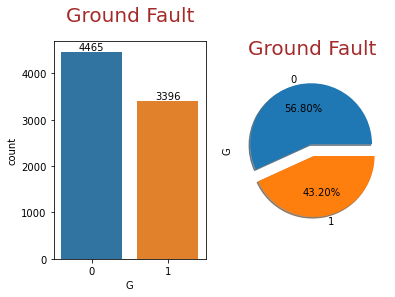

In [13]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='G', data=train_ds)
ax.bar_label(ax.containers[0])
plt.title("Ground Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=train_ds['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True)
ax.set_title(label = "Ground Fault", fontsize = 20,color='Brown',pad=20)

In [14]:
train_ds['Fault_Type'] = train_ds['G'].astype('str') + train_ds['C'].astype('str') + train_ds['B'].astype('str') + train_ds['A'].astype('str')
train_ds.head()


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [15]:
train_ds['Fault_Type'][train_ds['Fault_Type'] == '0000' ] = 'NO Fault'
train_ds['Fault_Type'][train_ds['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
train_ds['Fault_Type'][train_ds['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
train_ds['Fault_Type'][train_ds['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
train_ds['Fault_Type'][train_ds['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
train_ds['Fault_Type'][train_ds['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'
teste_LabelEnconder = train_ds
train_ds.head()

/tmp/ipykernel_999/288564435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds['Fault_Type'][train_ds['Fault_Type'] == '0000' ] = 'NO Fault'
/tmp/ipykernel_999/288564435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds['Fault_Type'][train_ds['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
/tmp/ipykernel_999/288564435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ds['Fault_Type'][train_ds['Fault_T

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.


(-1.25, 1.25, -1.25, 1.25)

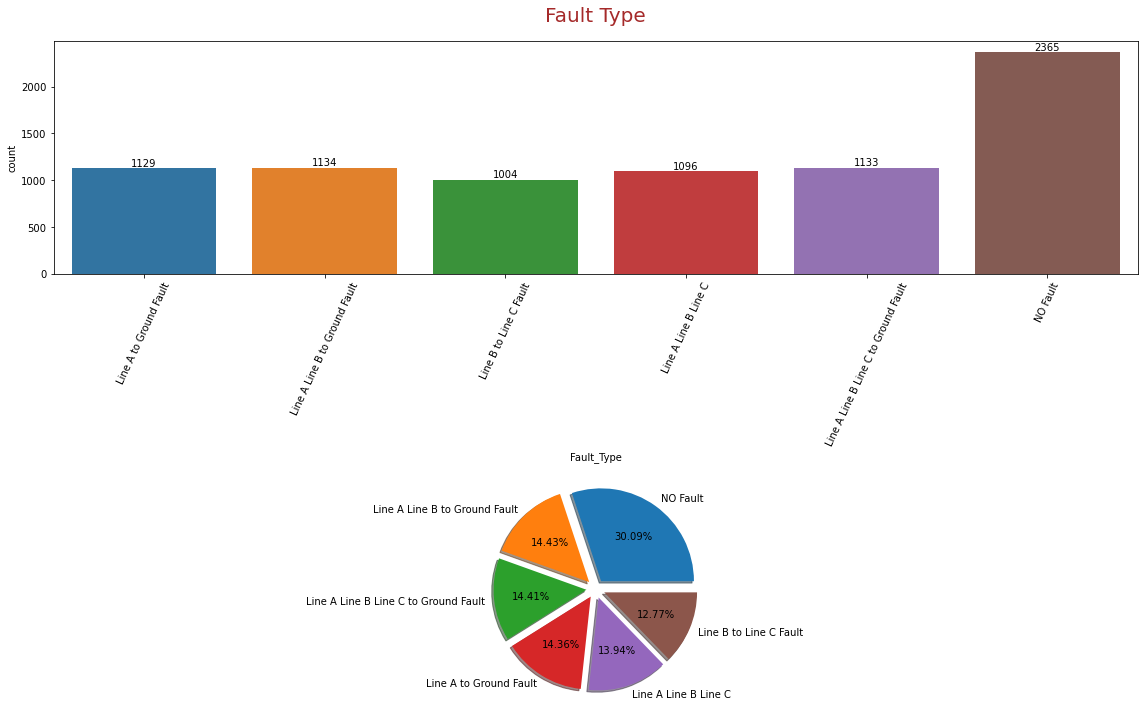

In [16]:
ax = plt.figure(figsize = (16,10))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=train_ds)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',font='Lucida Calligraphy',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=train_ds['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.axis('off')


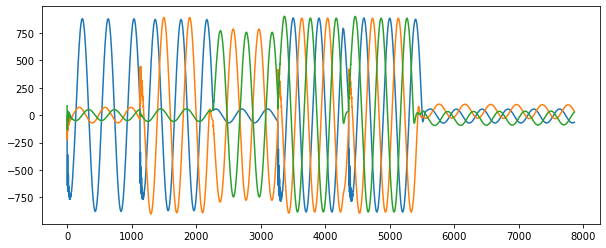

In [17]:
plt.figure(figsize = (10,4))
plt.plot(train_ds["Ia"])
plt.plot(train_ds["Ib"])
plt.plot(train_ds["Ic"]);

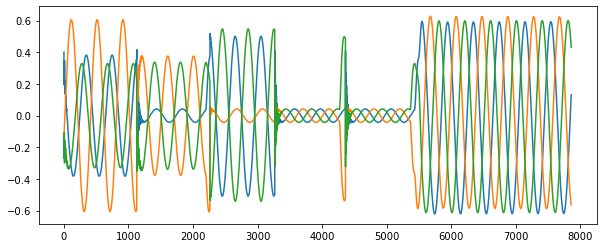

In [18]:
plt.figure(figsize = (10,4))
plt.plot(train_ds["Va"])
plt.plot(train_ds["Vb"])
plt.plot(train_ds["Vc"]);

# Modelo

In [19]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Min_Max_Scaler = preprocessing.MinMaxScaler()


In [20]:
train_ds.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


In [22]:
LabelEncoder = preprocessing.LabelEncoder()

LabelEncoder.fit(train_ds["Fault_Type"])

teste_aux = LabelEncoder.transform(train_ds["Fault_Type"])
teste_aux

array([3, 3, 3, ..., 5, 5, 5])

In [23]:
train_ds['encoded'] = LabelEncoder.transform(train_ds['Fault_Type'])
keys = LabelEncoder.classes_
values = LabelEncoder.transform(LabelEncoder.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'Line A Line B Line C': 0, 'Line A Line B Line C to Ground Fault': 1, 'Line A Line B to Ground Fault': 2, 'Line A to Ground Fault': 3, 'Line B to Line C Fault': 4, 'NO Fault': 5}


In [24]:
train_ds.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type,encoded
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault,3


In [25]:
namesColumns = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'encoded']

In [26]:
labelX = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
labelY = "encoded"

x = np.array(train_ds[labelX])
y = np.array(train_ds[labelY])

In [27]:
x = Min_Max_Scaler.fit_transform(x)
x

array([[0.413869  , 0.49757125, 0.54305757, 0.83998528, 0.38440376,
        0.28435789],
       [0.30936644, 0.46036953, 0.50525074, 0.76760749, 0.39193015,
        0.34925764],
       [0.21514432, 0.4054293 , 0.44963504, 0.72895617, 0.3994813 ,
        0.38031664],
       ...,
       [0.46238877, 0.5233474 , 0.50960887, 0.60345407, 0.04029893,
        0.87214445],
       [0.4626245 , 0.52279168, 0.50993285, 0.61109955, 0.03796598,
        0.86685598],
       [0.46286823, 0.52223521, 0.51024963, 0.61871774, 0.0357486 ,
        0.86147711]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [29]:
X_train

array([[0.52575559, 0.1153376 , 0.8591048 , 0.56670695, 0.50960467,
        0.43078233],
       [0.48780942, 0.55550923, 0.45192469, 0.00108482, 0.76501585,
        0.73764264],
       [0.69649975, 0.79890866, 0.00381426, 0.54515308, 0.47720741,
        0.48540478],
       ...,
       [0.48637783, 0.55737294, 0.45138735, 0.        , 0.75307183,
        0.75090086],
       [0.40117475, 0.13463859, 0.46262054, 0.47698723, 0.72578194,
        0.30046178],
       [0.00588191, 0.81205033, 0.67415947, 0.49917316, 0.52562413,
        0.48217114]])

* 426 épocas para atingir um erro médio quadrático de 0,002 -> 99,83 % nos testes

In [30]:
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 6), max_iter=100000)  
mlp.fit(X_train, y_train)  

MLPClassifier(hidden_layer_sizes=(100, 100, 6), max_iter=100000)

In [32]:
predictions = mlp.predict(X_test) 

In [33]:
print(predictions)

[3 4 5 ... 4 5 5]


In [34]:
# Last thing: evaluation of algorithm performance in classifying flowers
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

[[ 93 135   2   0   1   0]
 [ 71 138  16   1   0   0]
 [  0   0 221   5   0   0]
 [  0   0  16 203   0   1]
 [  0   0   0   0 201   1]
 [  0   0   0   0   0 468]]
              precision    recall  f1-score   support

           0       0.57      0.40      0.47       231
           1       0.51      0.61      0.55       226
           2       0.87      0.98      0.92       226
           3       0.97      0.92      0.95       220
           4       1.00      1.00      1.00       202
           5       1.00      1.00      1.00       468

    accuracy                           0.84      1573
   macro avg       0.82      0.82      0.81      1573
weighted avg       0.84      0.84      0.84      1573



In [ ]:
import tensorflow as tf